-2.1023069420559066
2.6087930346146475
1.7210459140697463
-0.006209838173388604
0.2376537045650875
-0.25912668435372055
2.2539645886868653
1.1726440149042023
2.9352471897998864
2.0240489560775483
0.9909637331823125
-0.18743469904562726
-1.364906209895163
-1.6890933562922918
-0.7201415377917071
-1.388463594422986
2.796726054201903
0.5532858355310077
-1.703087845579273
-1.8616061690136334
-2.3305933440392086
-2.2709813755638892
2.3902747828079622
0.3764427720284975
-0.12038245461880326
-1.4869910642437925
-1.893361431104344
1.2222145408605147
-2.875085519636545
-0.4028075853229427
1.0477427127008223
-0.19058491516160547
-2.8567969751563442
2.4308833466611848
-1.5338961575318992
-2.6796301290516205
-2.890756193652577
1.7467659653907628
-1.7133244262921195
-0.0789013151819642
-0.7659190029221339
-2.755601029145344
0.23280789258836254
-2.739321886396331
-1.609955058646739
-2.3050580942799295
2.567591636711093
-0.2751562072198075
-0.9805715238826425
-2.1291288123221555
2.829095460906509
0.93

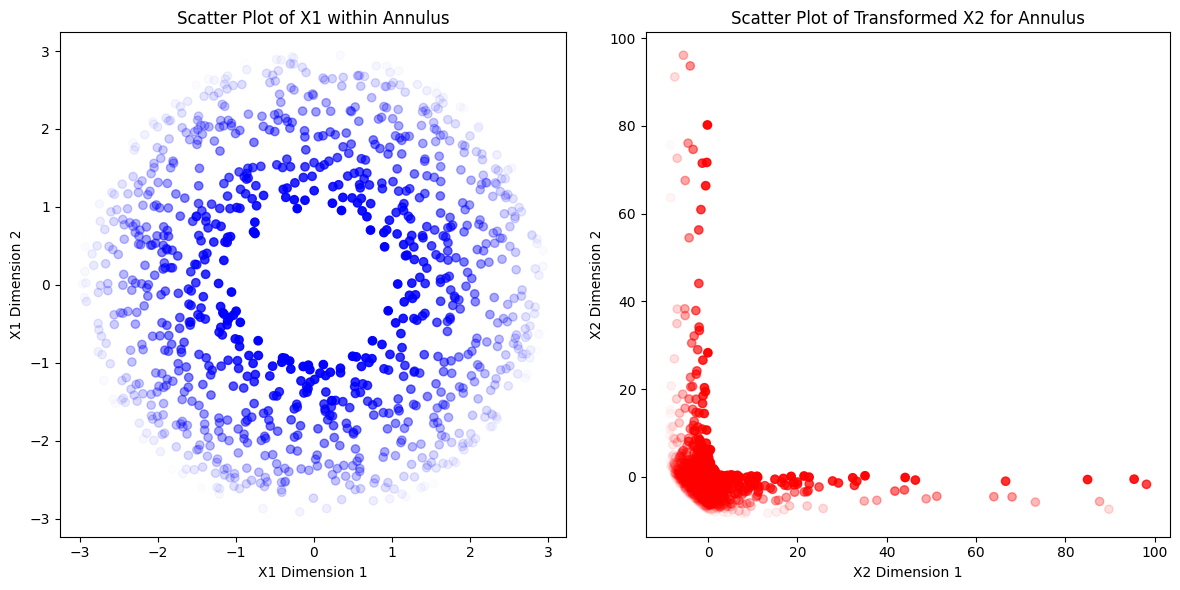

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sample_points_within_annulus(num_points, inner_radius, outer_radius,minval=0.1):
    """Sample points uniformly within an annulus defined by two radii."""
    points = []
    while len(points) < num_points:
        x, y = np.random.uniform(-outer_radius, outer_radius), np.random.uniform(-outer_radius, outer_radius)
        distance_squared = x**2 + y**2
        
        
        print(x)
        
        
        if inner_radius**2 <= distance_squared <= outer_radius**2:# and np.min((x,y))>minval:
            points.append((x, y))
    return np.array(points)

def new_transform(x):
    return np.exp(-np.abs(x)+0.01) + 1/np.square(np.abs(x)+0.1) - np.square(x)

# Parameters for the annulus
inner_radius = 1
outer_radius = 3

# Sample points within the annulus
x1_samples_annulus = sample_points_within_annulus(1000, inner_radius, outer_radius)

# Generate noise for the transformation
noise = np.random.normal(0, 0.1, x1_samples_annulus.shape)

# Calculate corresponding X2 values for the new transformation
x2_samples_annulus = new_transform(x1_samples_annulus) + noise

# Calculate opacities based on distance from the center for the new set of points
distances_annulus = np.sqrt(x1_samples_annulus[:, 0]**2 + x1_samples_annulus[:, 1]**2)
opacities_annulus = 1 - (distances_annulus - inner_radius) / (outer_radius - inner_radius)

# Plotting for the annulus
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for X1 within the annulus
axs[0].scatter(x1_samples_annulus[:, 0], x1_samples_annulus[:, 1], 
               color='blue', alpha=opacities_annulus)
axs[0].set_title('Scatter Plot of X1 within Annulus')
axs[0].set_xlabel('X1 Dimension 1')
axs[0].set_ylabel('X1 Dimension 2')
axs[0].set_aspect('equal', 'box')  # Ensuring the annulus appears circular

# Scatter plot for X2 with the new transformation and matching opacities
axs[1].scatter(x2_samples_annulus[:, 0], x2_samples_annulus[:, 1], 
               color='red', alpha=opacities_annulus)
axs[1].set_title('Scatter Plot of Transformed X2 for Annulus')
axs[1].set_xlabel('X2 Dimension 1')
axs[1].set_ylabel('X2 Dimension 2')

plt.tight_layout()
plt.show()


In [7]:
np.min((1.0,1.2))

1.0